In [1]:
from BertFineTuning.loader import *
from BertFineTuning.loader_config import default_loader_config
from BertFineTuning.question_answering import *
from transformers.optimization import AdamW
import torch
%matplotlib inline

In [2]:
BFT=BertFineTuning()

In [3]:
BFT.criterion=nn.CrossEntropyLoss(ignore_index=-1)
BFT.optimizer = AdamW(BFT.parameters_main)
BFT.scheduler=torch.optim.lr_scheduler.StepLR(BFT.optimizer, step_size=10)

In [4]:
dataloader_config={
'train-v1.1_bert_ready':default_loader_config,
'dev-v1.1_bert_ready':default_loader_config,
'train-v2.0_bert_ready':default_loader_config,
'dev-v2.0_bert_ready':default_loader_config
}

In [5]:
model_config

{'num_classes': 2,
 'dropout_prob': 0.1,
 'in_features': 768,
 'learning_rate_PT': 1e-05,
 'learning_rate_CLS': 0.01,
 'weight_decay': 0,
 'max_token_length': 100,
 'device': device(type='cuda', index=0)}

In [6]:
cwd = os.getcwd()
processed_data_folder=os.path.join(cwd,'data','processed')
ml=MultiLoader(processed_data_folder,dataloader_config,model_config)

WARNING - dev_v1_1_bert_ready.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - dev_v2_0_bert_ready.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - train_v1_1_bert_ready.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - train_v2_0_bert_ready.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.


In [7]:
# model_config={'num_classes': 2,
#  'dropout_prob': 0.1,
#  'in_features': 768,
#  'learning_rate_PT': 1e-05,
#  'learning_rate_CLS': 1e-2,
#  'weight_decay': 0,
#  'max_token_length': 100,
#  'device': device}

In [15]:
BFT.train(model_config,ml.train_v1_1_bert_ready,ml.dev_v1_1_bert_ready,epochs=100,print_every=100,validate_at_epoch=0)

epoch:  1  step:  1 / 4
Batch Loss:  4.578687
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.00642064206420642, 1.0: 0.00642064206420642}
Accuracy:  {0.0: 0.9803271287128713, 1.0: 0.9803271287128713}
{'F1 Macro ': 0.5032103210321032} {'F1 Micro': 0.9803271287128713}
{'F1 ': {0.0: 0.9900642064206421, 1.0: 0.016356435643564357}}
Precision:  {0.0: 0.9900642064206421, 1.0: 0.016356435643564357}
recall:  {0.0: 0.9900642064206421, 1.0: 0.016356435643564357}
Predict       0.0           1.0           
Actual
0.0           9899652       99348         

1.0           99348         1652          


epoch:  1  step:  2 / 4
Batch Loss:  4.2445545
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.012971297129712971, 1.0: 0.012971297129712971}
Accuracy:  {0.0: 0.9804568316831683, 1.0: 0.9804568316831683}
{'F1 Macro ': 0.5064856485648564} {'F1 Micro': 0.9804568316831683}
{'F1 ': {0.0: 0.9901297129712971, 1.0: 0.02284158415841584}}
Precision:  {0.0: 0.9901297129712971, 1.0: 0.0228415

epoch:  4  step:  3 / 4
Batch Loss:  1.4991251
train results: 

{0.0: 'Very Good', 1.0: 'Very Good'}
MCC:  {0.0: 0.6935893589358936, 1.0: 0.6935893589358936}
Accuracy:  {0.0: 0.9939330693069307, 1.0: 0.9939330693069307}
{'F1 Macro ': 0.8467946794679468} {'F1 Micro': 0.9939330693069307}
{'F1 ': {0.0: 0.996935893589359, 1.0: 0.6966534653465346}}
Precision:  {0.0: 0.996935893589359, 1.0: 0.6966534653465346}
recall:  {0.0: 0.996935893589359, 1.0: 0.6966534653465346}
Predict       0.0           1.0           
Actual
0.0           9968362       30638         

1.0           30638         70362         


epoch:  4  step:  4 / 4
Batch Loss:  1.6135665
train results: 

{0.0: 'Very Good', 1.0: 'Very Good'}
MCC:  {0.0: 0.6532453245324532, 1.0: 0.6532453245324532}
Accuracy:  {0.0: 0.9931342574257426, 1.0: 0.9931342574257426}
{'F1 Macro ': 0.8266226622662267} {'F1 Micro': 0.9931342574257426}
{'F1 ': {0.0: 0.9965324532453246, 1.0: 0.6567128712871287}}
Precision:  {0.0: 0.9965324532453246, 1.0: 0.65

epoch:  7 Train  Loss:  0.5874128 

epoch:  8  step:  1 / 4
Batch Loss:  0.3536482
train results: 

{0.0: 'Excellent', 1.0: 'Excellent'}
MCC:  {0.0: 0.8625128291530197, 1.0: 0.8625128291530197}
Accuracy:  {0.0: 0.9972777540172298, 1.0: 0.9972777540172298}
{'F1 Macro ': 0.9312564145765099} {'F1 Micro': 0.9972777540172298}
{'F1 ': {0.0: 0.9986251282915302, 1.0: 0.8638877008614896}}
Precision:  {0.0: 0.9986251282915302, 1.0: 0.8638877008614896}
recall:  {0.0: 0.9986251282915302, 1.0: 0.8638877008614896}
Predict        0.0            1.0            
Actual
0.0            38834526       53466          

1.0            53466          339342         


epoch:  8  step:  2 / 4
Batch Loss:  0.44707042
train results: 

{0.0: 'Excellent', 1.0: 'Excellent'}
MCC:  {0.0: 0.9194619461946195, 1.0: 0.9194619461946195}
Accuracy:  {0.0: 0.9984053465346535, 1.0: 0.9984053465346535}
{'F1 Macro ': 0.9597309730973098} {'F1 Micro': 0.9984053465346535}
{'F1 ': {0.0: 0.9991946194619462, 1.0: 0.9202673267326733}

KeyboardInterrupt: 

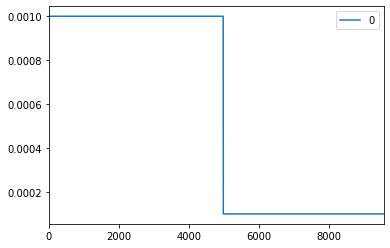

In [10]:
pd.DataFrame(BFT.learning_rate).plot()

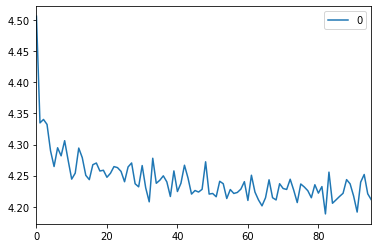

In [11]:
pd.DataFrame([np.mean(item) for item in chunks(BFT.loss_history,100)]).plot()

In [6]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

In [ ]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,4900)],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss',grid=True)
ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")

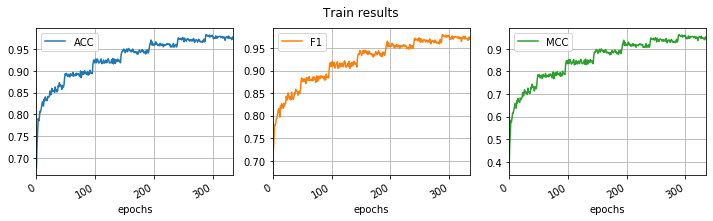

In [11]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Train results',grid=True);

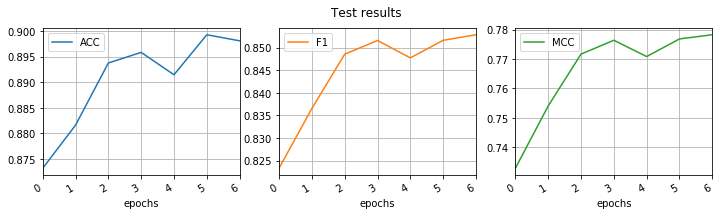

In [12]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Test results',grid=True);

In [5]:
from transformers import BertTokenizer, BertForQuestionAnswering,DistilBertForQuestionAnswering, BertConfig

In [10]:
x=BertForQuestionAnswering.from_pretrained('bert-base-uncased')

In [7]:
import pandas as pd
%matplotlib inline

In [8]:
df=pd.read_csv('./data/processed/dev_v1_1_1.csv')

In [14]:
df.head()

,Unnamed: 0,qa_id,start_label,end_label,text,total_tokens
0,0,5733be284776f41900661182,130,138,[CLS] To whom did the Virgin Mary allegedly ap...,192
1,1,5733be284776f4190066117f,52,57,[CLS] What is in front of the Notre Dame Main ...,184
2,2,5733be284776f41900661180,28,31,[CLS] The Basilica of the Sacred heart at Notr...,192
3,3,5733be284776f41900661181,95,102,[CLS] What is the Grotto at Notre Dame? [SEP] ...,180
4,4,5733be284776f4190066117e,33,40,[CLS] What sits on top of the Main Building at...,186


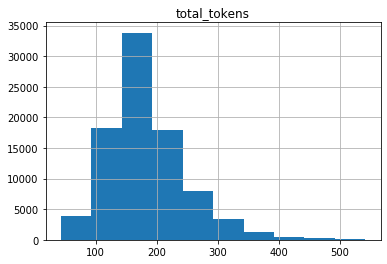

In [15]:
df.hist('total_tokens');

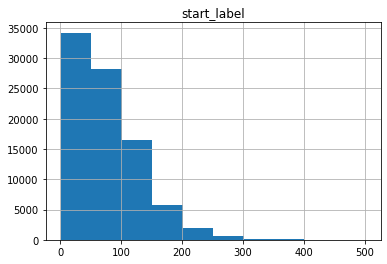

In [12]:
df.hist('start_label');

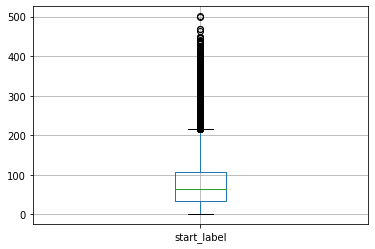

In [13]:
df.boxplot('start_label');

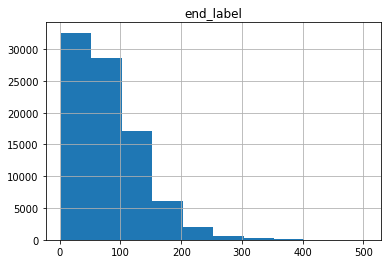

In [11]:
df.hist('end_label');

In [16]:
df[df.isna()].shape

(87598, 10)

In [17]:
new_df=df[~df.isna()]

In [18]:
new_df.to_csv('./data/processed/dev_v1_1_2.csv')